#  LSTM vs GRU Spatial Evaluation

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import numpy as np
import xarray as xr
import pandas as pd
import math
from scipy.stats import skew

### Define the lists to hold Latitudes and Longitudes for all data points

In [2]:
latitude = [
    35.90060043334961, 35.92279815673828, 35.945098876953125,
    35.96730041503906, 35.96730041503906, 35.989601135253906,
    35.989601135253906, 35.989601135253906, 35.989601135253906,
    36.01190185546875, 36.01190185546875, 36.01190185546875,
    36.01190185546875, 36.03409957885742, 36.03409957885742,
    36.03409957885742, 36.03409957885742, 36.056400299072266,
    36.056400299072266, 36.056400299072266, 36.056400299072266,
    36.07870101928711, 36.07870101928711, 36.07870101928711,
    36.07870101928711, 36.07870101928711, 36.07870101928711,
    35.945098876953125, 36.03409957885742, 36.056400299072266,
    36.01190185546875, 36.03409957885742, 36.056400299072266,
    35.96730041503906, 35.989601135253906, 36.01190185546875,
    35.96730041503906
]

longitude = [
    14.569199562072754, 14.569199562072754, 14.569199562072754,
    14.528599739074707, 14.569199562072754, 14.447500228881836,
    14.48799991607666, 14.528599739074707, 14.569199562072754,
    14.447500228881836, 14.48799991607666, 14.528599739074707,
    14.569199562072754, 14.447500228881836, 14.48799991607666,
    14.528599739074707, 14.569199562072754, 14.447500228881836,
    14.48799991607666, 14.528599739074707, 14.569199562072754,
    14.366399765014648, 14.406900405883789, 14.447500228881836,
    14.48799991607666, 14.528599739074707, 14.569199562072754,
    14.528599739074707, 14.406900405883789, 14.406900405883789,
    14.406900405883789, 14.366399765014648, 14.366399765014648,
    14.48799991607666, 14.406900405883789, 14.366399765014648,
    14.447500228881836
]

### Histogram visualization of number of Data Points per location: 

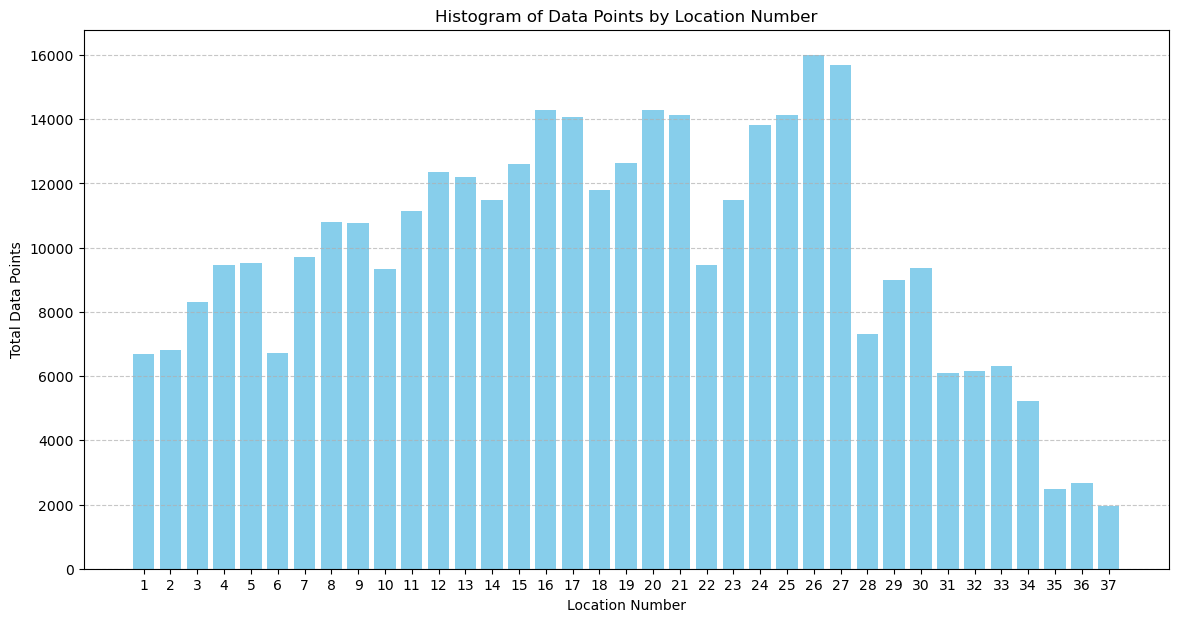

In [3]:
data = {
    'Number': list(range(1, 38)),
    'Count': [
        6694, 6804, 8293, 9458, 9507, 6729, 9718, 10792, 10783,
        9350, 11153, 12368, 12187, 11500, 12616, 14282, 14072,
        11792, 12634, 14282, 14120, 9464, 11484, 13834, 14137,
        15989, 15703, 7301, 8998, 9364, 6111, 6154, 6324, 5224,
        2489, 2683, 1964
    ]
}

# Convert the data dictionary into a pandas DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(df['Number'], df['Count'], color='skyblue')

plt.title('Histogram of Data Points by Location Number')
plt.xlabel('Location Number')
plt.ylabel('Total Data Points')
plt.xticks(df['Number']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Heatmap visualization of number of Data Points per location: 
   - Using the `latitude` and `longitude` data, this section plots the locations on a map, providing a spatial distribution overview. Additionally, it uses a heatmap to represent the density (number) of data points.

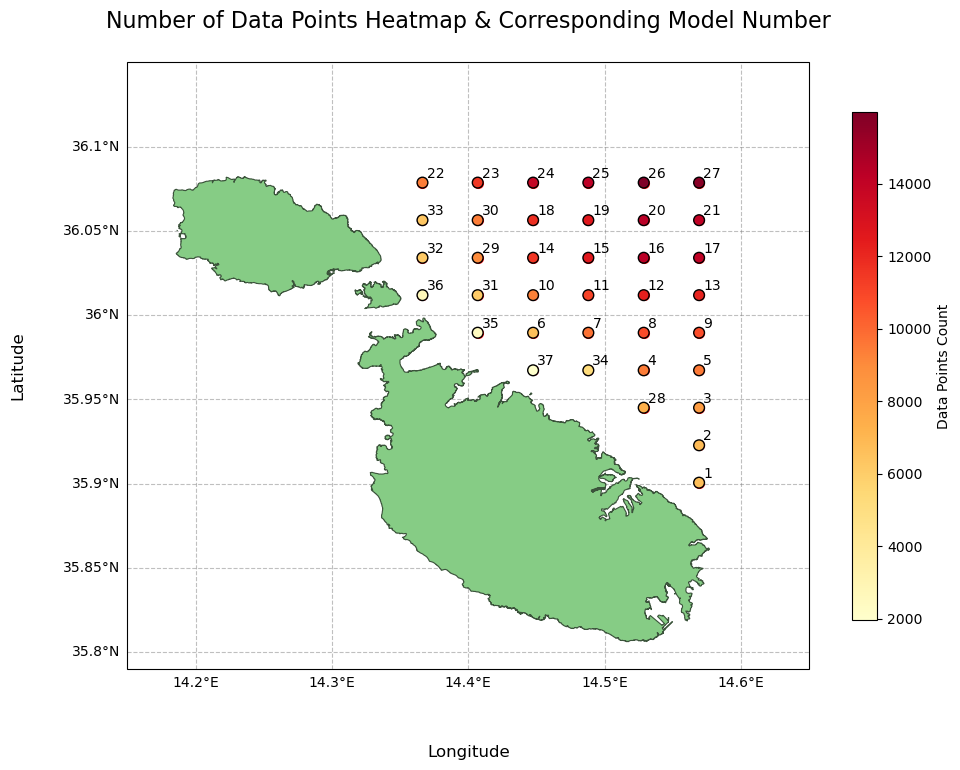

In [4]:
# Define a dictionary containing the latitude, longitude, and an identifier number for each data point
data = {
    'Latitude': latitude,
    'Longitude': longitude,
    'Number': list(range(1, 38))
}

# Load the shapefile for Malta's coastline 
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Initialize a matplotlib figure with a geographic projection (Plate Carree) to display maps and data with latitude and longitude
fig, ax = plt.subplots(figsize=(11, 11), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the geographic extent of the plot 
ax.set_extent([14.15, 14.65, 35.79, 36.15])

# Plot Malta's coastline on the map 
malta_coastline.plot(ax=ax, color='#86CC85', edgecolor='#3B533B', linewidth=0.8, zorder=4)

# Convert the data dictionary into a pandas DataFrame and add the 'Count' column to represent the number of data points at each location
df = pd.DataFrame(data)
df['Count'] = [
    6694, 6804, 8293, 9458, 9507, 6729, 9718, 10792, 10783,
    9350, 11153, 12368, 12187, 11500, 12616, 14282, 14072,
    11792, 12634, 14282, 14120, 9464, 11484, 13834, 14137,
    15989, 15703, 7301, 8998, 9364, 6111, 6154, 6324, 5224,
    2489, 2683, 1964
]

# Plot each point on the map. Numbers are displayed next to each point for identification
for lat, lon, number in zip(data['Latitude'], data['Longitude'], data['Number']):
    ax.plot(lon, lat, marker='o', color='red', markersize=7, transform=ccrs.Geodetic())
    offset_lat = 0.003
    offset_lon = 0.003
    ax.text(lon + offset_lon, lat + offset_lat, str(number), transform=ccrs.Geodetic(), fontsize=10, zorder=5)

# Create the heatmap using a scatter plot, using the actual count values for the color
scatter = ax.scatter(
    df['Longitude'], df['Latitude'],
    s=60,  
    c=df['Count'],  
    cmap='YlOrRd',  
    edgecolor='k',  
    transform=ccrs.Geodetic(),
    zorder=3  
)

# Add colorbar to the right of the plot, using the actual count values
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Data Points Count')

# Add gridlines and labels to improve map readability
gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Customize the plot appearance
plt.title("Number of Data Points Heatmap & Corresponding Model Number", pad=25, fontsize=16)
ax.text(-0.15, 0.50, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)
ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=12)

# Display the plot
plt.show()

---

#  Analysis for LSTM vs GRU predictions for 4th of August 2023

### Define the lists to hold the metrics for the models (4th of August 2023 Prediction)

In [5]:
lstm_mae_values_u = [
    0.06108554717145389, 0.06540178835727949, 0.27017779957200155, 0.4191201531496805, 0.23282335884857464,
    0.05013517712894045, 0.050484753608618094, 0.08900179101651136, 0.05872434321910889, 0.06931665547807252,
    0.027900122749753394, 0.053315444730983354, 0.05379749083481605, 0.0349735396140012, 0.03716759524977071,
    0.04047005151885849, 0.0543720211459473, 0.05937918207302967, 0.05090706371383844, 0.06556309103622539,
    0.064213053962765, 0.091944696288818, 0.07947235137120495, 0.08146665037097364, 0.05787147793813754,
    0.07023683902356578, 0.08203857247434233, 0.07313875131890932, 0.2435463228052995, 0.08622150060341523, 
    0.19159777811756087, 0.24320531926974734, 0.21360758601351373, 1.402222516584806, 0.08609451169372799,
    0.1126734686630478, 0.20293174525285765
]

gru_mae_values_u = [
    0.06369391806105301, 0.08611791909076945, 0.33627686768908777, 0.36910475253959246, 0.2354061561183162,
    0.04741513148697365, 0.05295655453706147, 0.07729110226036094, 0.09988715106960917, 0.07483920705650972,
    0.044185912577371846, 0.053153238509456247, 0.06627595238981361, 0.07049478505969478, 0.04981910283011657,
    0.09882352676259705, 0.08603763424563544, 0.12118943215287742, 0.054725603430460956, 0.0752536187046034,
    0.07654290328950066, 0.08694954228805192, 0.08977994997728572, 0.09020178603424271, 0.060824639124430376,
    0.13200519741382968, 0.06755307181700333, 0.04681145231035202, 0.2334801153457926, 0.09526555162508571,
    0.20078293667475666, 0.24079832863901526, 0.20793771311614706, 1.3910668646249047, 0.06501001432141862,
    0.08862283430869485, 0.15754158519702657
] 

lstm_mae_values_v = [
    0.3679017230624209, 0.46575332597373986, 0.3022444530372321, 0.36528784613708537, 0.3381885495331005,
    0.06736732694989067, 0.054119873530827596, 0.05608027316364813, 0.04684351216379584, 0.05979004017777989,
    0.07572303170573809, 0.043180227831838745, 0.04237280495931578, 0.06572383177295216, 0.04954834624676635,
    0.04038072829021496, 0.03601977143593443, 0.06989793330203996, 0.05749050933461447, 0.05219508275442134,
    0.05845051135161675, 0.2528627167594539, 0.10385944046491992, 0.09195128136902715, 0.048107539272815185,
    0.04421128326301398, 0.052989123242683824, 0.5387065585635925, 0.13681444102571508, 0.36565769494417655,
    0.22297531981664534, 0.17767675741801958, 0.19370453653374112, 0.1045633808279058, 0.07972085596536166,
    0.06255286772078933, 0.12595831198987914
]

gru_mae_values_v = [
    0.37341085434002186, 0.46694271712186125, 0.2762695375159209, 0.37327226664489466, 0.3567190461620555,
    0.08233805256088662, 0.054628682848035126, 0.07168731052257964, 0.0636717521778523, 0.05078945445286979,
    0.04030069103696648, 0.04062239896680249, 0.036206754770780065, 0.05986705775401533, 0.049350944946609805,
    0.04402287046081557, 0.04721633107043921, 0.051802994178011846, 0.05905438096898726, 0.05386045444035318,
    0.05165511302868425, 0.25828163485498296, 0.11081902221257102, 0.05071112343033476, 0.050688052350663725,
    0.05911981447489101, 0.053244317059304595, 0.5601553724627871, 0.15611919244424602, 0.35790664081368195,
    0.20677708220058064, 0.17459406696796717, 0.1846712836605936, 0.1998671440943817, 0.0919535653309481,
    0.015058168286198234, 0.12110587581741365
] 

### Heatmaps of MAE Values for 'u' and 'v' Components:
   - For both LSTM and GRU models, it visualizes the MAE values of 'u' and 'v' components using heatmaps. These visualizations compare model accuracy spatially, illustrating where each model performs better or worse.

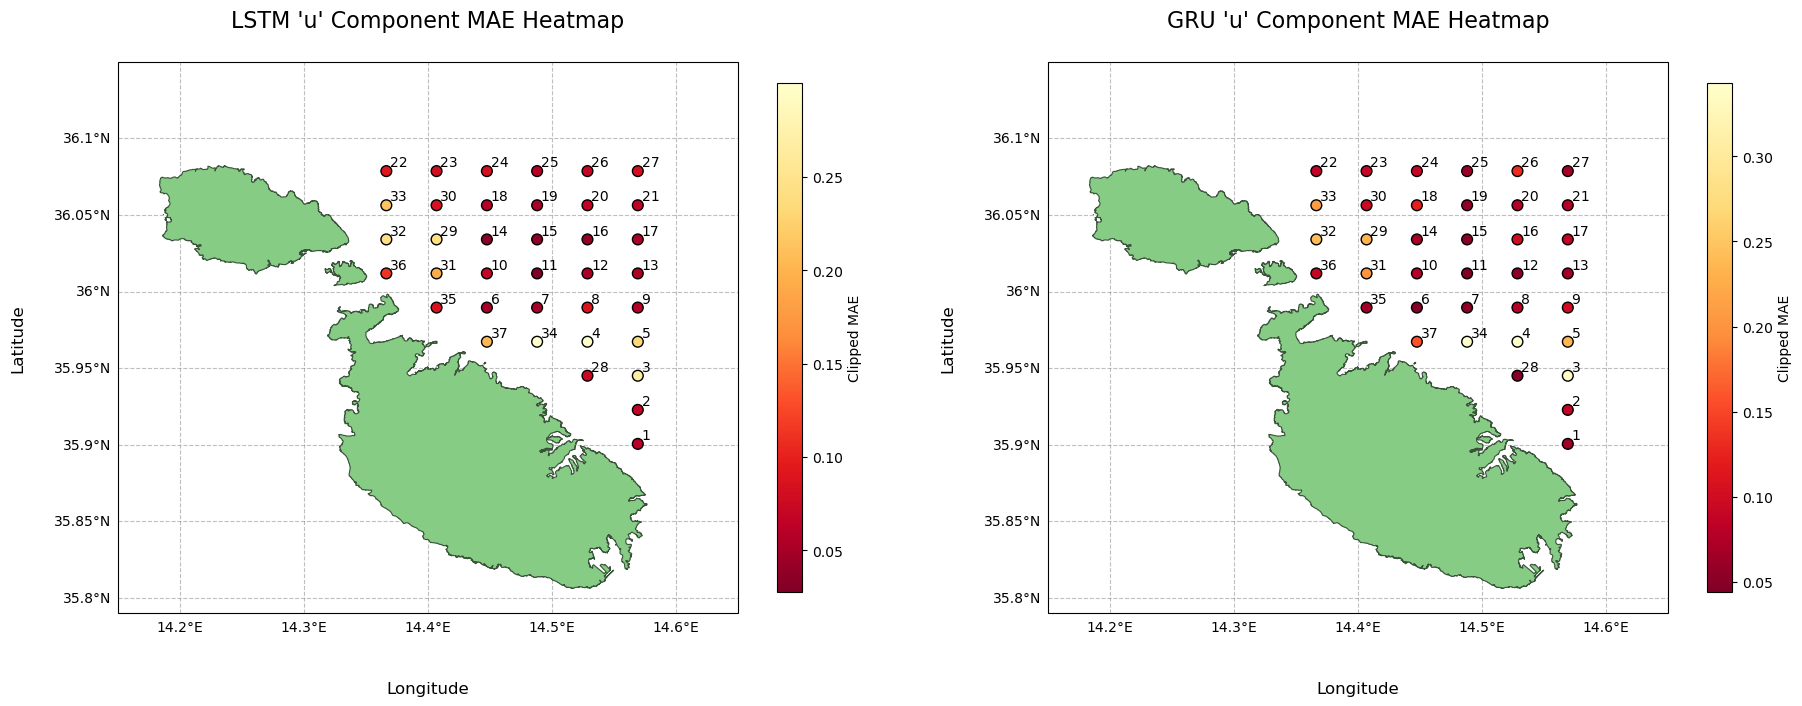

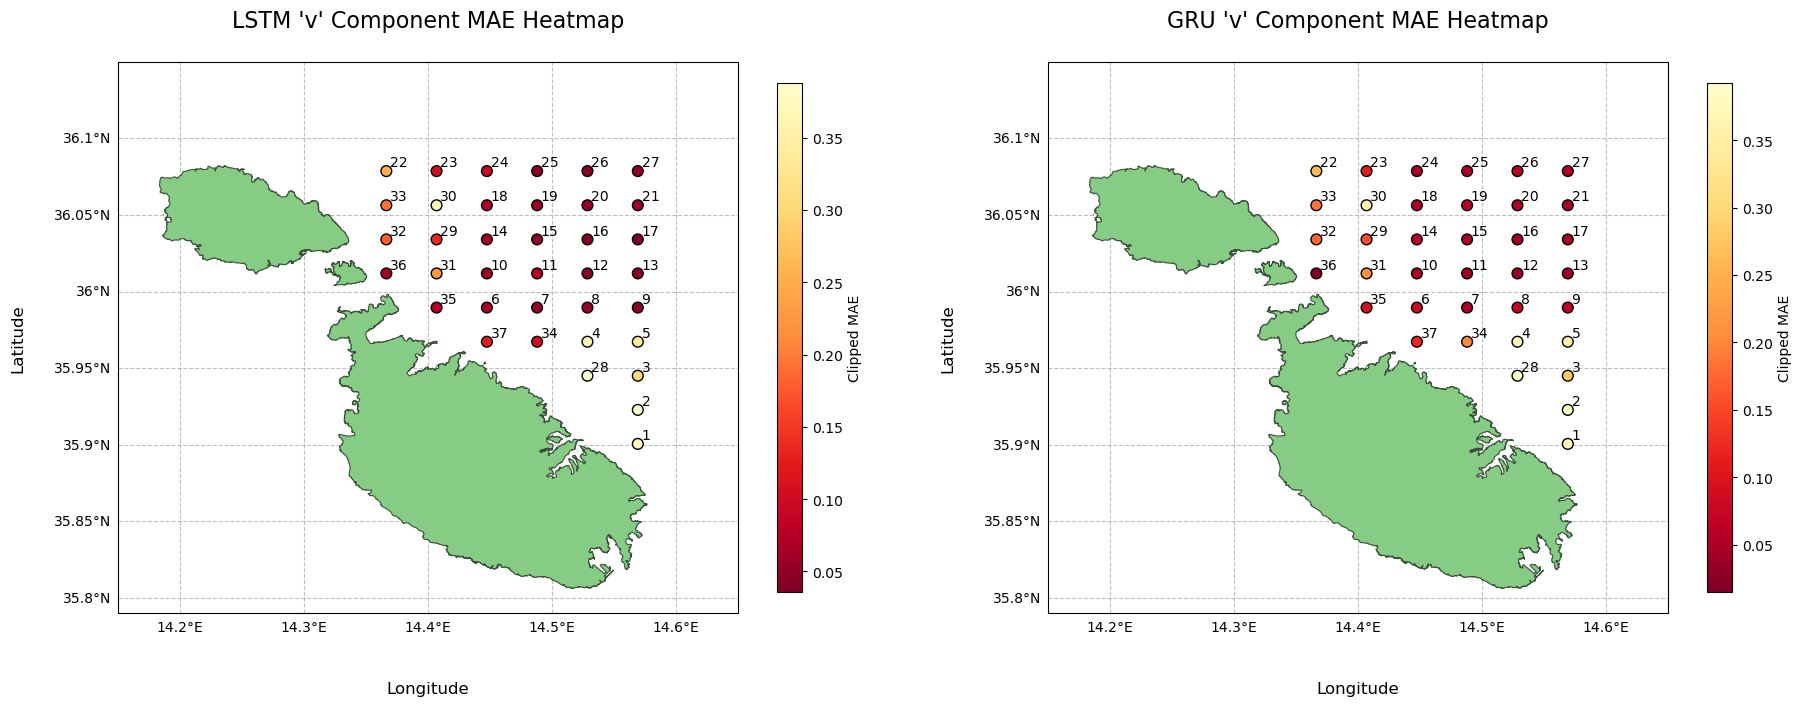

In [6]:
# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare subplots with a geographic (Plate Carree) projection
fig, axs = plt.subplots(1, 2, figsize=(22, 11), subplot_kw={'projection': ccrs.PlateCarree()})

# Common settings for both plots
extent = [14.15, 14.65, 35.79, 36.15]
coastline_color = '#86CC85'
edge_color = '#3B533B'

# Set a threshold value to clip the MAE values at the 95th percentile
threshold_lstm = np.percentile(lstm_mae_values_u, 95)
threshold_gru = np.percentile(gru_mae_values_u, 95)

# Clip the MAE values at the threshold
clipped_mae_lstm = np.clip(lstm_mae_values_u, None, threshold_lstm)
clipped_mae_gru = np.clip(gru_mae_values_u, None, threshold_gru)

# Plot settings for LSTM
axs[0].set_extent(extent)
malta_coastline.plot(ax=axs[0], color=coastline_color, edgecolor=edge_color, linewidth=0.8, zorder=4)
lstm_scatter = axs[0].scatter(longitude, latitude, s=60, c=clipped_mae_lstm, cmap='YlOrRd_r', edgecolor='k', transform=ccrs.Geodetic(), zorder=3)
axs[0].set_title("LSTM 'u' Component MAE Heatmap", pad=25, fontsize=16)
plt.colorbar(lstm_scatter, ax=axs[0], shrink=0.6, label='Clipped MAE')

# Plot settings for GRU
axs[1].set_extent(extent)
malta_coastline.plot(ax=axs[1], color=coastline_color, edgecolor=edge_color, linewidth=0.8, zorder=4)
gru_scatter = axs[1].scatter(longitude, latitude, s=60, c=clipped_mae_gru, cmap='YlOrRd_r', edgecolor='k', transform=ccrs.Geodetic(), zorder=3)
axs[1].set_title("GRU 'u' Component MAE Heatmap", pad=25, fontsize=16)
plt.colorbar(gru_scatter, ax=axs[1], shrink=0.6, label='Clipped MAE')

# Customize appearance for both plots
for ax in axs:
    ax.text(-0.15, 0.50, 'Latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    for lat, lon, number in zip(latitude, longitude, range(1, 38)):
        ax.text(lon + 0.003, lat + 0.003, str(number), transform=ccrs.Geodetic(), fontsize=10, zorder=5)

plt.show()

# Load the shapefile for Malta's coastline
shapefile_path = '../Data/land_sea_mask/MaltaCoastline.shp'
malta_coastline = gpd.read_file(shapefile_path).to_crs(epsg=4326)

# Prepare subplots with a geographic (Plate Carree) projection
fig, axs = plt.subplots(1, 2, figsize=(22, 11), subplot_kw={'projection': ccrs.PlateCarree()})

# Common settings for both plots
extent = [14.15, 14.65, 35.79, 36.15]
coastline_color = '#86CC85'
edge_color = '#3B533B'

# Set a threshold value to clip the MAE values at the 95th percentile for both LSTM and GRU
threshold_lstm_v = np.percentile(lstm_mae_values_v, 95)
threshold_gru_v = np.percentile(gru_mae_values_v, 95)

# Clip the MAE values at the threshold for both LSTM and GRU
clipped_mae_lstm_v = np.clip(lstm_mae_values_v, None, threshold_lstm_v)
clipped_mae_gru_v = np.clip(gru_mae_values_v, None, threshold_gru_v)

# Plot settings for LSTM 'v' component
axs[0].set_extent(extent)
malta_coastline.plot(ax=axs[0], color=coastline_color, edgecolor=edge_color, linewidth=0.8, zorder=4)
lstm_scatter_v = axs[0].scatter(longitude, latitude, s=60, c=clipped_mae_lstm_v, cmap='YlOrRd_r', edgecolor='k', transform=ccrs.Geodetic(), zorder=3)
axs[0].set_title("LSTM 'v' Component MAE Heatmap", pad=25, fontsize=16)
plt.colorbar(lstm_scatter_v, ax=axs[0], shrink=0.6, label='Clipped MAE')

# Plot settings for GRU 'v' component
axs[1].set_extent(extent)
malta_coastline.plot(ax=axs[1], color=coastline_color, edgecolor=edge_color, linewidth=0.8, zorder=4)
gru_scatter_v = axs[1].scatter(longitude, latitude, s=60, c=clipped_mae_gru_v, cmap='YlOrRd_r', edgecolor='k', transform=ccrs.Geodetic(), zorder=3)
axs[1].set_title("GRU 'v' Component MAE Heatmap", pad=25, fontsize=16)
plt.colorbar(gru_scatter_v, ax=axs[1], shrink=0.6, label='Clipped MAE')

# Customize appearance for both plots
for ax in axs:
    ax.text(-0.15, 0.50, 'Latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    for lat, lon, number in zip(latitude, longitude, range(1, 38)):
        ax.text(lon + 0.003, lat + 0.003, str(number), transform=ccrs.Geodetic(), fontsize=10, zorder=5)

plt.show()

### Centroid & Skewness Analysis for Lagrangian Simulation (LSTM vs GRU)

- **Calculating and Comparing Centroids:**
  - Calculates the geographical centroid of the prediction points for LSTM and GRU models and measures the distance between these centroids. A smaller distance suggests closer agreement between the models' predictions.

- **Spread Calculation:**
  - Measures the spread (standard deviation of distances from the centroid) of prediction points for each model, indicating the consistency of model predictions across the studied area.

- **Skewness Calculation:**
  - Calculates the skewness of the longitude and latitude distributions of prediction points for both models. Skewness helps identify directional biases in model predictions.

In [7]:
# Load the predicted datasets for both LSTM and GRU
lstm_predicted_ds = xr.open_zarr("../Lagrangian_Output/LSTM_predicted_values.zarr")
gru_predicted_ds = xr.open_zarr("../Lagrangian_Output/GRU_predicted_values.zarr")

# Extract the longitude and latitude data for all time steps and particles
lstm_lon_data = lstm_predicted_ds.variables['lon'].values
lstm_lat_data = lstm_predicted_ds.variables['lat'].values
gru_lon_data = gru_predicted_ds.variables['lon'].values
gru_lat_data = gru_predicted_ds.variables['lat'].values

# Create DataFrames for the LSTM and GRU predictions
lstm_df = pd.DataFrame({
    'lon': lstm_lon_data.flatten(), 
    'lat': lstm_lat_data.flatten(),
})

gru_df = pd.DataFrame({
    'lon': gru_lon_data.flatten(),
    'lat': gru_lat_data.flatten(),
})

# Function to calculate the centroid of a DataFrame
def calculate_centroid(df):
    return df['lon'].mean(), df['lat'].mean()

# Calculate the centroids for each model
lstm_centroid = calculate_centroid(lstm_df)
gru_centroid = calculate_centroid(gru_df)

# Conversion factor from degrees to kilometers
km_per_degree = 111

# # Plot the LSTM and GRU predictions and centroids
# plt.scatter(lstm_df['lon'], lstm_df['lat'], alpha=0.5, label='LSTM Predictions')
# plt.scatter(gru_df['lon'], gru_df['lat'], alpha=0.5, label='GRU Predictions')
# plt.scatter(*lstm_centroid, color='red', label='LSTM Centroid', marker='x')
# plt.scatter(*gru_centroid, color='blue', label='GRU Centroid', marker='x')
# plt.title('LSTM vs GRU Predictions and Centroids')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend()
# plt.show()

# Initialize an empty list to store distances
centroid_distances = []
num_obs = lstm_predicted_ds.dims['obs']

# Iterate over each observation step to calculate and compare centroids for LSTM and GRU predictions at that step
for obs in range(num_obs):
    # Extract prediction data for the current observation step from both models
    lstm_data_at_obs = lstm_predicted_ds.isel(obs=obs)
    gru_data_at_obs = gru_predicted_ds.isel(obs=obs)
    
    # Flatten the data and organize into DataFrames for easy manipulation
    lstm_df_obs = pd.DataFrame({
        'lon': lstm_data_at_obs.lon.values.flatten(), 
        'lat': lstm_data_at_obs.lat.values.flatten()
    })
    gru_df_obs = pd.DataFrame({
        'lon': gru_data_at_obs.lon.values.flatten(), 
        'lat': gru_data_at_obs.lat.values.flatten()
    })
    
    # Calculate centroids for each set of predictions
    lstm_centroid = calculate_centroid(lstm_df_obs)
    gru_centroid = calculate_centroid(gru_df_obs)
    
    # Calculate and store the distance between the centroids of LSTM and GRU predictions
    centroid_distance = math.sqrt((lstm_centroid[0] - gru_centroid[0])**2 + 
                                  (lstm_centroid[1] - gru_centroid[1])**2)
    centroid_distances.append(centroid_distance)

# Statistical Summary
mean_distance = np.mean(centroid_distances)
median_distance = np.median(centroid_distances)
std_dev_distance = np.std(centroid_distances)

# Convert to kilometers
mean_distance_km = np.mean(centroid_distances) * km_per_degree
median_distance_km = np.median(centroid_distances) * km_per_degree
std_dev_distance_km = np.std(centroid_distances) * km_per_degree

print("===========================================================================================")
print(f"Mean Centroid Distance: {mean_distance:.6f} degrees ({mean_distance_km:.2f} km)")
print(f"Median Centroid Distance: {median_distance:.6f} degrees ({median_distance_km:.2f} km)")
print(f"Standard Deviation of Centroid Distances: {std_dev_distance:.6f} degrees ({std_dev_distance_km:.2f} km)")
print("===========================================================================================")

# Function to calculate the spread of a set of points from a centroid
def calculate_spread(df, centroid):
    # Calculate the distance of each point from the centroid
    distances = np.sqrt((df['lon'] - centroid[0])**2 + (df['lat'] - centroid[1])**2)
    # Calculate the standard deviation of these distances
    spread = np.std(distances)
    return spread

# Calculate spread for each model
lstm_spread = calculate_spread(lstm_df, lstm_centroid)
gru_spread = calculate_spread(gru_df, gru_centroid)

# Convert spread from degrees to kilometers
lstm_spread_km = lstm_spread * km_per_degree
gru_spread_km = gru_spread * km_per_degree

# Print out the spread in both degrees and kilometers
print(f"LSTM Spread: {lstm_spread:.6f} degrees ({lstm_spread_km:.2f} km)")
print(f"GRU Spread: {gru_spread:.6f} degrees ({gru_spread_km:.2f} km)")

# Calculate skewness for each model
lstm_skew_lon = skew(lstm_df['lon'])
lstm_skew_lat = skew(lstm_df['lat'])
gru_skew_lon = skew(gru_df['lon'])
gru_skew_lat = skew(gru_df['lat'])

# Print out the skewness for longitude and latitude
print("===========================================================================================")
print(f"LSTM Longitude Skewness: {lstm_skew_lon:.6f}")
print(f"LSTM Latitude Skewness: {lstm_skew_lat:.6f}")
print(f"GRU Longitude Skewness: {gru_skew_lon:.6f}")
print(f"GRU Latitude Skewness: {gru_skew_lat:.6f}")
print("===========================================================================================")

Mean Centroid Distance: 0.019570 degrees (2.17 km)
Median Centroid Distance: 0.018598 degrees (2.06 km)
Standard Deviation of Centroid Distances: 0.013839 degrees (1.54 km)
LSTM Spread: 0.016261 degrees (1.81 km)
GRU Spread: 0.004905 degrees (0.54 km)
LSTM Longitude Skewness: 0.248566
LSTM Latitude Skewness: -0.487350
GRU Longitude Skewness: -1.076138
GRU Latitude Skewness: 0.380908


---

#  Analysis for LSTM vs GRU predictions for 4th of November 2023

### Define the lists to hold the metrics for the models

In [8]:
lstm_mae_values_u = [
     0.7055804565224567, 0.3944681274436399, 0.38666356240002714, 7.191481728133667, 8.071516150330572, 
     0.11038885667522667, 0.2950900033125596, 6.91810945921273, 5.051334886768568, 0.10145743464590706, 
     0.08704207657031841, 1.0913755249318742, 0.8774882758116824, 0.07705371010526409, 0.08435457202695418, 
     0.11060610610131742, 0.13282019111155394, 0.1399384754525402, 0.07948175819731705, 0.17822341336109707,
     0.1552369203331379, 0.135769926036162, 0.1395468931136249, 0.08144840934565381, 0.08798038701043638, 
     0.05057205888112678, 0.06406798597840323, 0.36175103631002953, 0.09523901602402927, 0.11448995848398251, 
     0.22840088972311065, 0.11397238517630405, 0.09864302189808678, 0.036445237534373544, 3.331717603273957,
     0.8242917173350909, 0.1582041594692021
]

gru_mae_values_u = [
     0.728949606137824, 0.6416110229565436, 0.19667792531000725, 7.2225932235419394, 8.082857336056719,
     0.11879316001733063, 0.29591319126479987, 6.891089407061905, 5.005637297383089, 0.08702841711065103,
     0.09472986054500691, 1.113385991529926, 0.916764903346747, 0.13117321136816731, 0.08334478024793275,
     0.19139908286654062, 0.18612933117879105, 0.16854706690353938, 0.07833559440589898, 0.16354947633631559,
     0.17066332638789547, 0.12173460666998011, 0.07344230621703778, 0.05849204030795202, 0.0746218294136337,
     0.20697903981633395, 0.1321389144029417, 0.6629338168024596, 0.07971830088601402, 0.09293589411111203,
     0.2523438147590642, 0.09936784298009498, 0.09685082532030664, 0.03828997088922456, 3.3403252377141768,
     0.823946739465749, 0.16731258033063937
] 

lstm_mae_values_v = [
     0.9301522650307805, 0.327056398475794, 0.5353526289189826, 17.19514705608071, 19.89693482714939,
     0.12762783511943662, 9.061840787318408, 16.41889935189406, 16.54866393864408, 0.05326064963517887,
     0.1470973630674817, 4.67637808358063, 4.2909786488674335, 0.06539202382266275, 0.09215566012959342,
     0.0856865681633201, 0.08240410952073447, 0.08884647073133374, 0.11316974855996802, 0.08014743600048362,
     0.048875357181140965, 0.07126951839997549, 0.0857645229154188, 0.06942243589831716, 0.0809684675331759,
     0.07198243136884809, 0.07355416985636067, 0.23542594811427112, 0.050712643636869115, 0.06848049335368772,
     0.10447901321365849, 0.05479736456714169, 0.07409863392763064, 0.19242811777214008, 4.143168986611097,
     0.5797234005392875, 0.17818368589578415
]

gru_mae_values_v = [
     0.3396227829618126, 0.3504029514059963, 0.42948831353673916, 17.201998859378666, 19.93114674260846,
     0.10287281461442259, 9.081987812593141, 16.42568461601636, 16.553912808607382, 0.050013744197818656,
     0.10549616151304901, 4.681749393397467, 4.301296022927054, 0.0643871491632453, 0.07752280227868542, 
     0.10381595358902929, 0.05355954085036674, 0.10396162651652584, 0.11617936063051977, 0.07103940622888744, 
     0.05757545272876848, 0.06978422051079165, 0.07945748505774723, 0.12144120973062962, 0.0945624326254706,
     0.09326897291410345, 0.09191757849540703, 0.489384123693978, 0.05154913577428517, 0.07093178698980113, 
     0.09349478661804811, 0.059213409043176374, 0.06489240861673568, 1.3652329284997762, 4.143594718840002, 
     0.608312247044919, 0.46608828813841785
] 

### Heatmaps of MAE Values for 'u' and 'v' Components:
   - For both LSTM and GRU models, it visualizes the MAE values of 'u' and 'v' components using heatmaps. These visualizations compare model accuracy spatially, illustrating where each model performs better or worse.

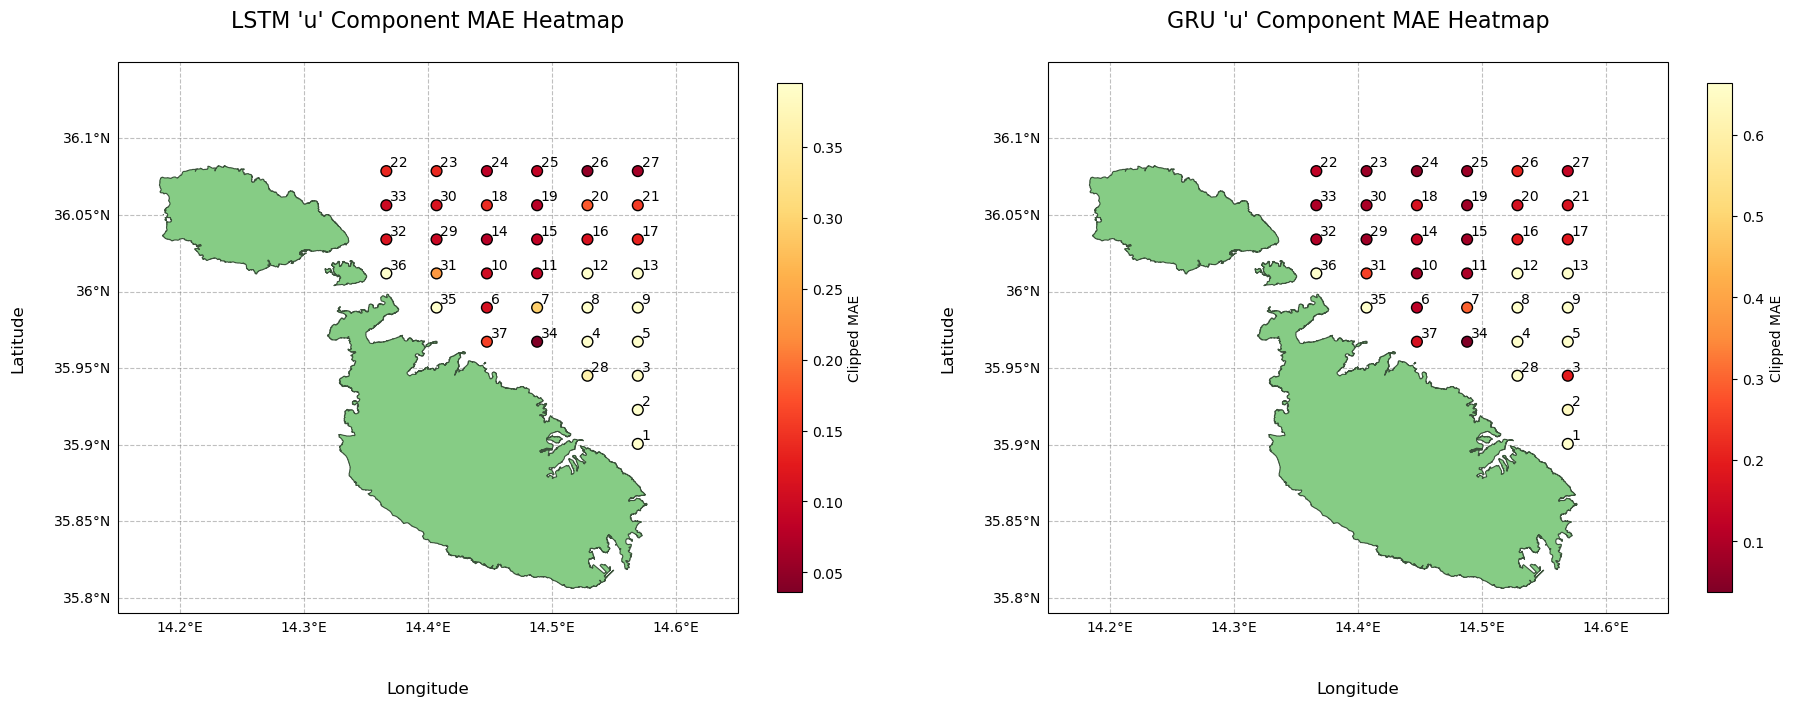

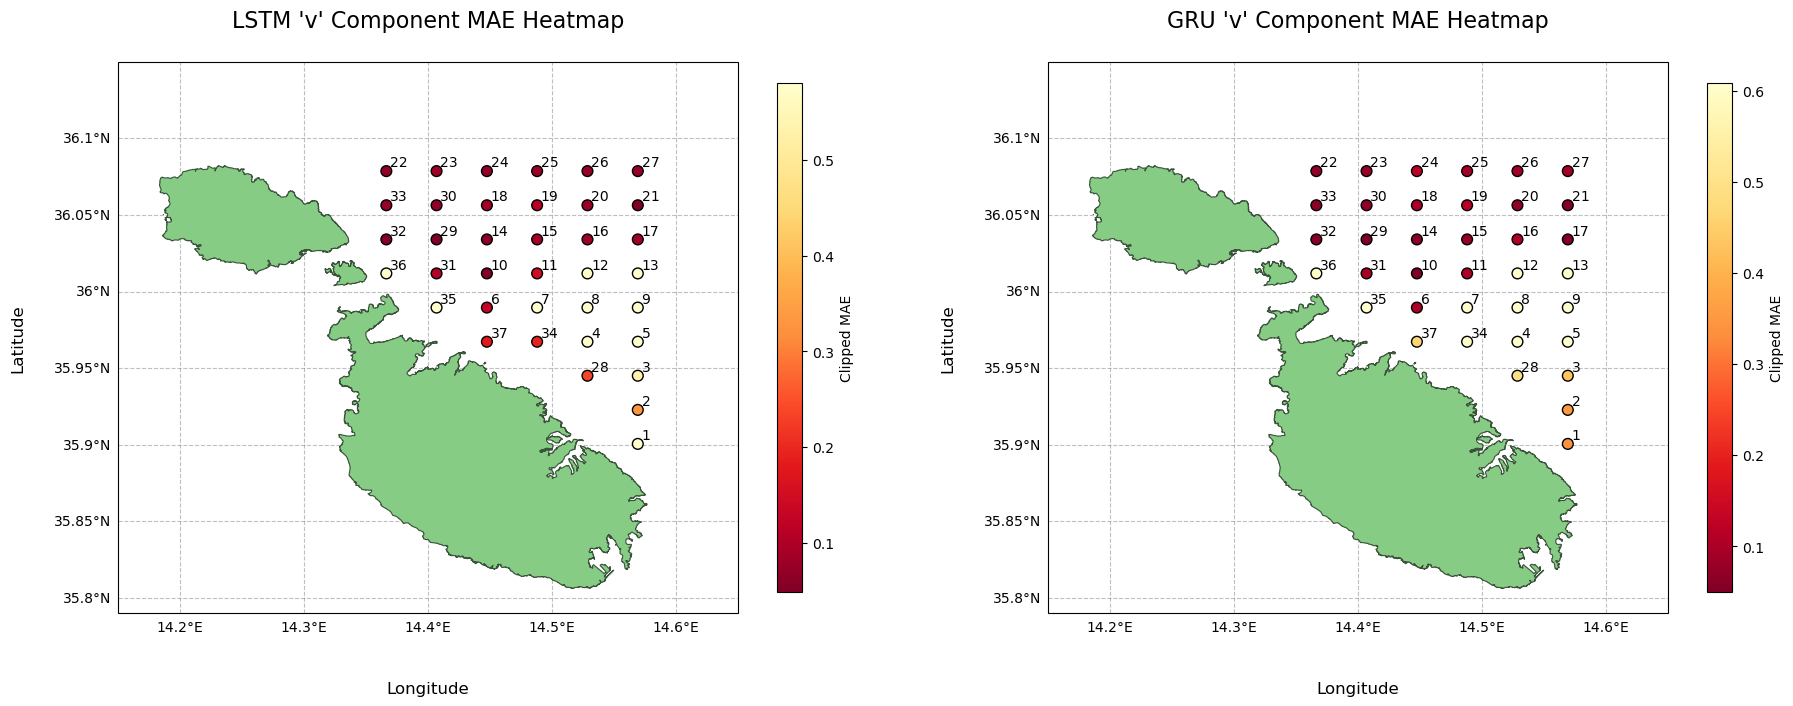

In [9]:
# Prepare subplots with a geographic (Plate Carree) projection
fig, axs = plt.subplots(1, 2, figsize=(22, 11), subplot_kw={'projection': ccrs.PlateCarree()})

# Set a threshold value to clip the MAE values at the 95th percentile
threshold_lstm = np.percentile(lstm_mae_values_u, 75)
threshold_gru = np.percentile(gru_mae_values_u, 75)

# Clip the MAE values at the threshold
clipped_mae_lstm = np.clip(lstm_mae_values_u, None, threshold_lstm)
clipped_mae_gru = np.clip(gru_mae_values_u, None, threshold_gru)

# Plot settings for LSTM
axs[0].set_extent(extent)
malta_coastline.plot(ax=axs[0], color=coastline_color, edgecolor=edge_color, linewidth=0.8, zorder=4)
lstm_scatter = axs[0].scatter(longitude, latitude, s=60, c=clipped_mae_lstm, cmap='YlOrRd_r', edgecolor='k', transform=ccrs.Geodetic(), zorder=3)
axs[0].set_title("LSTM 'u' Component MAE Heatmap", pad=25, fontsize=16)
plt.colorbar(lstm_scatter, ax=axs[0], shrink=0.6, label='Clipped MAE')

# Plot settings for GRU
axs[1].set_extent(extent)
malta_coastline.plot(ax=axs[1], color=coastline_color, edgecolor=edge_color, linewidth=0.8, zorder=4)
gru_scatter = axs[1].scatter(longitude, latitude, s=60, c=clipped_mae_gru, cmap='YlOrRd_r', edgecolor='k', transform=ccrs.Geodetic(), zorder=3)
axs[1].set_title("GRU 'u' Component MAE Heatmap", pad=25, fontsize=16)
plt.colorbar(gru_scatter, ax=axs[1], shrink=0.6, label='Clipped MAE')

# Customize appearance for both plots
for ax in axs:
    ax.text(-0.15, 0.50, 'Latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    for lat, lon, number in zip(latitude, longitude, range(1, 38)):
        ax.text(lon + 0.003, lat + 0.003, str(number), transform=ccrs.Geodetic(), fontsize=10, zorder=5)

plt.show()

# Prepare subplots with a geographic (Plate Carree) projection
fig, axs = plt.subplots(1, 2, figsize=(22, 11), subplot_kw={'projection': ccrs.PlateCarree()})

# Set a threshold value to clip the MAE values at the 95th percentile for both LSTM and GRU
threshold_lstm_v = np.percentile(lstm_mae_values_v, 75)
threshold_gru_v = np.percentile(gru_mae_values_v, 75)

# Clip the MAE values at the threshold for both LSTM and GRU
clipped_mae_lstm_v = np.clip(lstm_mae_values_v, None, threshold_lstm_v)
clipped_mae_gru_v = np.clip(gru_mae_values_v, None, threshold_gru_v)

# Plot settings for LSTM 'v' component
axs[0].set_extent(extent)
malta_coastline.plot(ax=axs[0], color=coastline_color, edgecolor=edge_color, linewidth=0.8, zorder=4)
lstm_scatter_v = axs[0].scatter(longitude, latitude, s=60, c=clipped_mae_lstm_v, cmap='YlOrRd_r', edgecolor='k', transform=ccrs.Geodetic(), zorder=3)
axs[0].set_title("LSTM 'v' Component MAE Heatmap", pad=25, fontsize=16)
plt.colorbar(lstm_scatter_v, ax=axs[0], shrink=0.6, label='Clipped MAE')

# Plot settings for GRU 'v' component
axs[1].set_extent(extent)
malta_coastline.plot(ax=axs[1], color=coastline_color, edgecolor=edge_color, linewidth=0.8, zorder=4)
gru_scatter_v = axs[1].scatter(longitude, latitude, s=60, c=clipped_mae_gru_v, cmap='YlOrRd_r', edgecolor='k', transform=ccrs.Geodetic(), zorder=3)
axs[1].set_title("GRU 'v' Component MAE Heatmap", pad=25, fontsize=16)
plt.colorbar(gru_scatter_v, ax=axs[1], shrink=0.6, label='Clipped MAE')

# Customize appearance for both plots
for ax in axs:
    ax.text(-0.15, 0.50, 'Latitude', va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    ax.text(0.5, -0.15, 'Longitude', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    gl = ax.gridlines(draw_labels=True, linewidth=0.8, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    for lat, lon, number in zip(latitude, longitude, range(1, 38)):
        ax.text(lon + 0.003, lat + 0.003, str(number), transform=ccrs.Geodetic(), fontsize=10, zorder=5)

plt.show()

### Centroid & Skewness Analysis for Lagrangian Simulation

- **Calculating and Comparing Centroids:**
  - Calculates the geographical centroid of the prediction points for LSTM and GRU models and measures the distance between these centroids. A smaller distance suggests closer agreement between the models' predictions.

- **Spread Calculation:**
  - Measures the spread (standard deviation of distances from the centroid) of prediction points for each model, indicating the consistency of model predictions across the studied area.

- **Skewness Calculation:**
  - Calculates the skewness of the longitude and latitude distributions of prediction points for both models. Skewness helps identify directional biases in model predictions.

In [10]:
# Load the predicted datasets for both LSTM and GRU
lstm_predicted_ds = xr.open_zarr("../Lagrangian_Output/LSTM_predicted_values_2.zarr")
gru_predicted_ds = xr.open_zarr("../Lagrangian_Output/GRU_predicted_values_2.zarr")

# Extract the longitude and latitude data for all time steps and particles
lstm_lon_data = lstm_predicted_ds.variables['lon'].values
lstm_lat_data = lstm_predicted_ds.variables['lat'].values
gru_lon_data = gru_predicted_ds.variables['lon'].values
gru_lat_data = gru_predicted_ds.variables['lat'].values

# Create DataFrames for the LSTM and GRU predictions
lstm_df = pd.DataFrame({
    'lon': lstm_lon_data.flatten(), 
    'lat': lstm_lat_data.flatten(),
})

gru_df = pd.DataFrame({
    'lon': gru_lon_data.flatten(),
    'lat': gru_lat_data.flatten(),
})

# Function to calculate the centroid of a DataFrame
def calculate_centroid(df):
    return df['lon'].mean(), df['lat'].mean()

# Calculate the centroids for each model
lstm_centroid = calculate_centroid(lstm_df)
gru_centroid = calculate_centroid(gru_df)

# Conversion factor from degrees to kilometers
km_per_degree = 111

# # Plot the LSTM and GRU predictions and centroids
# plt.scatter(lstm_df['lon'], lstm_df['lat'], alpha=0.5, label='LSTM Predictions')
# plt.scatter(gru_df['lon'], gru_df['lat'], alpha=0.5, label='GRU Predictions')
# plt.scatter(*lstm_centroid, color='red', label='LSTM Centroid', marker='x')
# plt.scatter(*gru_centroid, color='blue', label='GRU Centroid', marker='x')
# plt.title('LSTM vs GRU Predictions and Centroids')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.legend()
# plt.show()

# Initialize an empty list to store distances
centroid_distances = []
num_obs = lstm_predicted_ds.dims['obs']

# Iterate over each observation step to calculate and compare centroids for LSTM and GRU predictions at that step
for obs in range(num_obs):
    # Extract prediction data for the current observation step from both models
    lstm_data_at_obs = lstm_predicted_ds.isel(obs=obs)
    gru_data_at_obs = gru_predicted_ds.isel(obs=obs)
    
    # Flatten the data and organize into DataFrames for easy manipulation
    lstm_df_obs = pd.DataFrame({
        'lon': lstm_data_at_obs.lon.values.flatten(), 
        'lat': lstm_data_at_obs.lat.values.flatten()
    })
    gru_df_obs = pd.DataFrame({
        'lon': gru_data_at_obs.lon.values.flatten(), 
        'lat': gru_data_at_obs.lat.values.flatten()
    })
    
    # Calculate centroids for each set of predictions
    lstm_centroid = calculate_centroid(lstm_df_obs)
    gru_centroid = calculate_centroid(gru_df_obs)
    
    # Calculate and store the distance between the centroids of LSTM and GRU predictions
    centroid_distance = math.sqrt((lstm_centroid[0] - gru_centroid[0])**2 + 
                                  (lstm_centroid[1] - gru_centroid[1])**2)
    centroid_distances.append(centroid_distance)

# Statistical Summary
mean_distance = np.mean(centroid_distances)
median_distance = np.median(centroid_distances)
std_dev_distance = np.std(centroid_distances)

# Convert to kilometers
mean_distance_km = np.mean(centroid_distances) * km_per_degree
median_distance_km = np.median(centroid_distances) * km_per_degree
std_dev_distance_km = np.std(centroid_distances) * km_per_degree

print("===========================================================================================")
print(f"Mean Centroid Distance: {mean_distance:.6f} degrees ({mean_distance_km:.2f} km)")
print(f"Median Centroid Distance: {median_distance:.6f} degrees ({median_distance_km:.2f} km)")
print(f"Standard Deviation of Centroid Distances: {std_dev_distance:.6f} degrees ({std_dev_distance_km:.2f} km)")
print("===========================================================================================")

# Function to calculate the spread of a set of points from a centroid
def calculate_spread(df, centroid):
    # Calculate the distance of each point from the centroid
    distances = np.sqrt((df['lon'] - centroid[0])**2 + (df['lat'] - centroid[1])**2)
    # Calculate the standard deviation of these distances
    spread = np.std(distances)
    return spread

# Calculate spread for each model
lstm_spread = calculate_spread(lstm_df, lstm_centroid)
gru_spread = calculate_spread(gru_df, gru_centroid)

# Convert spread from degrees to kilometers
lstm_spread_km = lstm_spread * km_per_degree
gru_spread_km = gru_spread * km_per_degree

# Print out the spread in both degrees and kilometers
print(f"LSTM Spread: {lstm_spread:.6f} degrees ({lstm_spread_km:.2f} km)")
print(f"GRU Spread: {gru_spread:.6f} degrees ({gru_spread_km:.2f} km)")

# Calculate skewness for each model
lstm_skew_lon = skew(lstm_df['lon'])
lstm_skew_lat = skew(lstm_df['lat'])
gru_skew_lon = skew(gru_df['lon'])
gru_skew_lat = skew(gru_df['lat'])

# Print out the skewness for longitude and latitude
print("===========================================================================================")
print(f"LSTM Longitude Skewness: {lstm_skew_lon:.6f}")
print(f"LSTM Latitude Skewness: {lstm_skew_lat:.6f}")
print(f"GRU Longitude Skewness: {gru_skew_lon:.6f}")
print(f"GRU Latitude Skewness: {gru_skew_lat:.6f}")
print("===========================================================================================")

Mean Centroid Distance: 0.014718 degrees (1.63 km)
Median Centroid Distance: 0.017193 degrees (1.91 km)
Standard Deviation of Centroid Distances: 0.006339 degrees (0.70 km)
LSTM Spread: 0.014387 degrees (1.60 km)
GRU Spread: 0.023217 degrees (2.58 km)
LSTM Longitude Skewness: 0.562745
LSTM Latitude Skewness: -0.166972
GRU Longitude Skewness: 0.277801
GRU Latitude Skewness: 0.475496


---